In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_excel("/Users/tina/Desktop/S&P종합.xlsx", index_col=0)

In [36]:
df1=df1.reset_index()

In [37]:
df1

,날짜,종가
0,1980-01-01,107.90
1,1980-01-02,105.80
2,1980-01-03,105.20
3,1980-01-04,106.50
4,1980-01-07,106.80
...,...,...
10687,2022-05-16,4008.01
10688,2022-05-17,4088.85
10689,2022-05-18,3923.68
10690,2022-05-19,3900.79


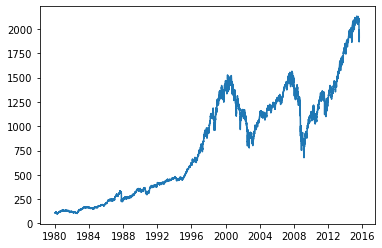

In [11]:
train=df1[0:9000]
test=df1[9000:]
plt.plot(train['날짜'], train['종가'])
plt.show()

In [43]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(train,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

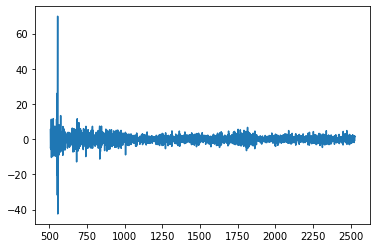

In [16]:
diff_2=diff_1.diff().dropna()
plt.plot(diff_2)
plt.show()

In [45]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,3))

model_fit = model.fit(disp=0)

print(model_fit.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

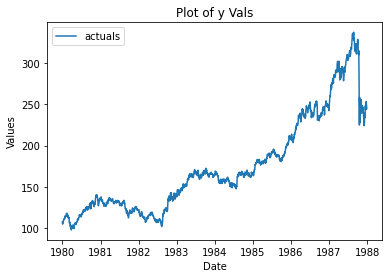

In [28]:
from scalecast.Forecaster import Forecaster
f=Forecaster(y=train['종가'], current_dates=train['날짜'])
f.plot()

In [14]:
pip install scalecast==0.1.8

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.13-py3-none-any.whl (172 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.11.tar.gz (5.4 MB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)
     |████████████████████████████████| 1.4 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 238 kB/s  eta 0:00:01
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
     |████████████████████████████████| 197 kB 61.5 MB/s eta 0:00:01
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl 

  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730985 sha256=cbef40b8a190469d660bb59533a29884ba2702f7245bff49ed4cc366bd7881df
  Stored in directory: /Users/tina/Library/Caches/pip/wheels/33/3d/82/4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus
Failed to build fbprophet
    Running setup.py install for fbprophet ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/tina/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/00/1xp8_gnx3j14s03qxz2k4j9c0000gn/T/pip-install-hpkhw6m5/fbprophet_f03c02a2b568482e9910d851374c633e/setup.py'"'"'; __file__='"'"'/private/var/folders/00/1xp8_gnx3j14s03qxz2k4j9c0000gn/T/pip-install-hpkhw6m5/fbprophet_f03c02a2b568482e9910d851374c633e/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().

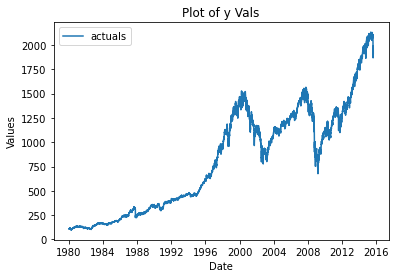

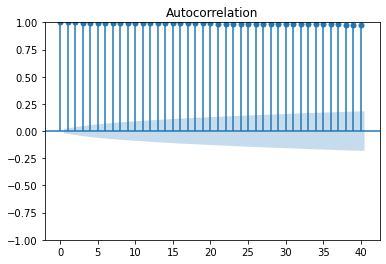

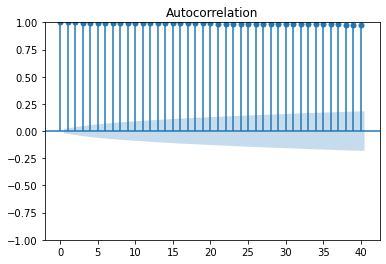

In [18]:
from scalecast.Forecaster import Forecaster
f=Forecaster(y=train['종가'], current_dates=train['날짜'])
f.plot()
f.plot_acf()

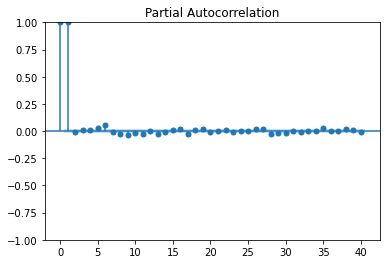

In [19]:
f.plot_pacf()
plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA

data_pn = df1.sort_index(ascending=True)
data_pn = df1.dropna()
model = ARIMA(df1.values, order = (1,1,1), dates=(data_pn.index))
model_fit = model.fit(trend='nc',full_output=True, disp=True)
print(model_fit.summary())
model_fit.plot_predict()

ValueError: Non-date index index provided to `dates` argument.

In [33]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=ARIMA(train['종가'], order=(1,2,0))
model_fit=model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D2.종가   No. Observations:                 2022
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -5030.645
Method:                       css-mle   S.D. of innovations              2.912
Date:                Wed, 25 May 2022   AIC                          10065.291
Time:                        22:33:07   BIC                          10076.514
Sample:                             2   HQIC                         10069.410
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D2.종가    -0.4214      0.020    -20.883      0.000      -0.461      -0.382
                                    Roots                                    
                  Real          Imaginary         

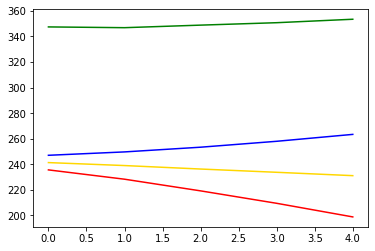

In [66]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.

zoo_test_df = pd.read_excel("/Users/tina/Desktop/기계/R 3종 데이터/S&P 500/1번데이터_test.xlsx", index_col=0,names=['ds', 'y'])

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. 
test_y = zoo_test_df.y.values # 실제 5일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 
plt.plot(test_y, color="green") # 실제 
 

In [67]:
pred_y

[241.32465647005046,
 239.00805149182003,
 236.28747252089195,
 233.7371119963625,
 231.11502824207543]

In [68]:
test_y

array([347.4, 346.8, 348.8, 350.7, 353.4])

## ARIMA가 아닌, 페이스북이 만든 시계열 예측 라이브러리


In [69]:
conda install -c conda-forge fbprophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.
